In [121]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sys.path.append("../src")
import utils

In [143]:
df = utils.load_data()

In [144]:
#plot languages?


In [ ]:
# sum of classes to see how many instances have what class? - split also by language
# check the the counts of the dom_narr and sub_narr arrays - may cause issue due to string format
#  subplots per class?
# how many ukraine texts, how many climate change? 
# Idea: give gpt the full document of describing the classes?
# add a language column to the data, for context
# are there any instances where both CC and URW categories are listed?

#TODO: topic distribution?

sub_mlb = utils.load_sub_mlb()
dom_mlb = utils.load_dom_mlb()

Dom and sub class frequency plots:

In [89]:
dom_classes_sum = df[dom_mlb.classes_].sum().sort_values(ascending = True)
sub_classes_sum = df[sub_mlb.classes_].sum().sort_values(ascending = True)

# plt.figure()
# plt.barh(dom_mlb.classes_, dom_classes_sum)
# plt.show()

# plt.figure(figsize=(10,20))
# plt.barh(sub_mlb.classes_, sub_classes_sum)
# plt.show()

In [93]:
dom_URW_classes = [cl for cl in dom_mlb.classes_ if cl[:3] == "URW"]
dom_CC_classes = [cl for cl in dom_mlb.classes_ if cl[:2] == "CC"]

URW_sum = df[dom_URW_classes].sum().sum() # lower than sub classes, multiple subclasses from dom class selected...
CC_sum = df[dom_CC_classes].sum().sum()
Other_sum = df["Other"].sum()

sums = {
    "Ukraine-Russia War" : URW_sum,
    "Climate Change": CC_sum,
    "Other": Other_sum
}

display(sums)

{'Ukraine-Russia War': 932, 'Climate Change': 267, 'Other': 147}

In [ ]:
sub_URW_classes = [cls for cls in sub_mlb.classes_ if cls[:3] == "URW"]
sub_CC_classes = [cls for cls in sub_mlb.classes_ if cls[:2] == "CC"]

URW_sum = df[sub_URW_classes].sum().sum()
CC_sum = df[sub_CC_classes].sum().sum()
Other_sum = df["Other"].sum()

sums = {
    "Ukraine-Russia War" : URW_sum,
    "Climate Change": CC_sum,
    "Other": Other_sum
}

display(sums)

{'Ukraine-Russia War': 1174, 'Climate Change': 379, 'Other': 147}

Class distribution:

In [97]:
#Number of sub classes:
print("number of sub-classes: ", len(sub_mlb.classes_))#.columns)
# number of sub urw classes:
print("number of sub urw classes: ", len(sub_URW_classes))
# number of sub CC classes:
print("number of sub cc classes: ", len(sub_CC_classes))

print()

#Number of dominant classes:
print("number of dominant classes: ", len(dom_mlb.classes_))
# number of dom urw classes:
print("number of dom urw classes:", len(dom_URW_classes))
# number of dom CC classes:
print("number of dom cc classes: ", len(dom_CC_classes))

print("The missing class in these is the Other class.")


number of sub-classes:  91
number of sub urw classes:  49
number of sub cc classes:  41

number of dominant classes:  22
number of dom urw classes: 11
number of dom cc classes:  10
The missing class in these is the Other class.


Average amount of classes per instance:

In [116]:
# number of sub & dom classes per instance, including the Other class
df["num_sub_classes"] = df[sub_mlb.classes_].sum(axis = 1)
df["num_dom_classes"] = df[dom_mlb.classes_].sum(axis = 1)
print(np.mean(df["num_sub_classes"]))
print(np.mean(df["num_dom_classes"]))

2.3415977961432506
1.8539944903581267


In [117]:
# average amount of sub and dom classes, if other class is exluded:
no_other_subs = [cls for cls in sub_mlb.classes_ if cls != "Other"]
no_other_doms = [cls for cls in dom_mlb.classes_ if cls != "Other"]

print(np.mean(df.loc[df["Other"] == 0, sub_mlb.classes_].sum(axis = 1)))
print(np.mean(df.loc[df["Other"] == 0, dom_mlb.classes_].sum(axis = 1)))

2.6822107081174438
2.070811744386874


In [ ]:
print(np.mean(df[sub_CC_classes].sum(axis=1))) # TODO: dit gaat nog niet helemaal goed
print(np.mean(df[sub_URW_classes].sum(axis=1)))

0.522038567493113
1.6170798898071626


Correlaties!

<AxesSubplot:>

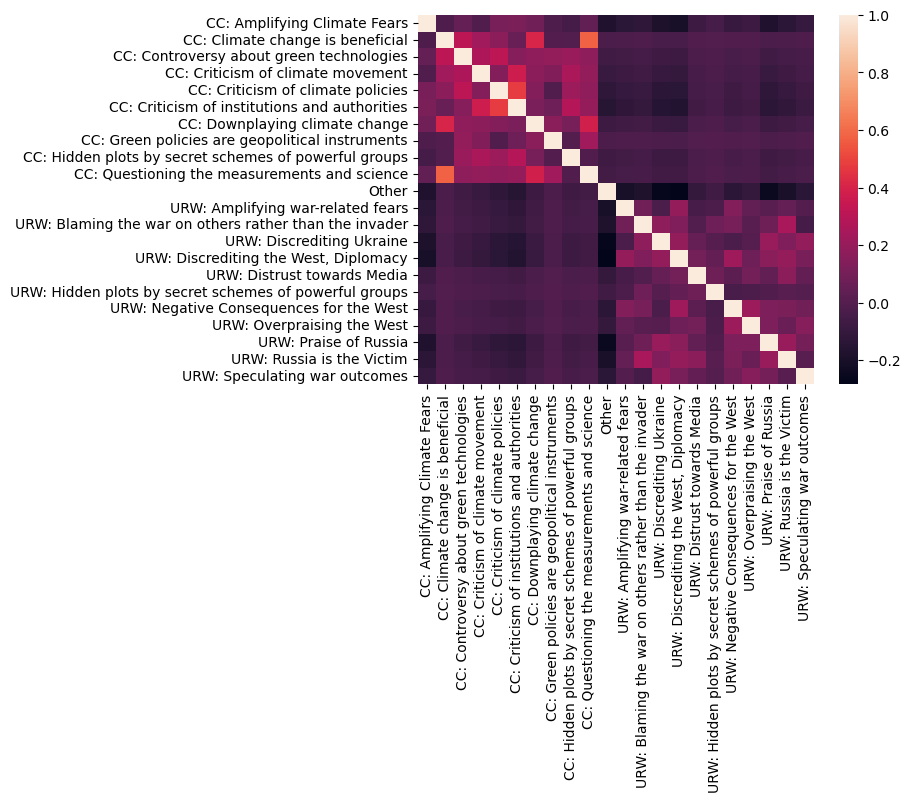

In [ ]:
# https://www.geeksforgeeks.org/create-a-correlation-matrix-using-python/
# Dominant classes correlation heat map
dom_matrix = df[dom_mlb.classes_].corr()
sns.heatmap(dom_matrix)

In [136]:
sub_CC_matrix = df[sub_CC_classes].corr().unstack().sort_values(ascending = False).drop_duplicates().head(20)
print(sub_CC_matrix)

CC: Amplifying Climate Fears: Amplifying existing fears of global warming           CC: Amplifying Climate Fears: Amplifying existing fears of global warming                         1.000000
CC: Controversy about green technologies: Renewable energy is costly                CC: Controversy about green technologies: Renewable energy is unreliable                          0.728270
CC: Controversy about green technologies: Renewable energy is dangerous             CC: Downplaying climate change: CO2 concentrations are too small to have an impact                0.706619
CC: Green policies are geopolitical instruments: Other                              CC: Downplaying climate change: Temperature increase does not have significant impact             0.706619
CC: Questioning the measurements and science: Data shows no temperature increase    CC: Downplaying climate change: Temperature increase does not have significant impact             0.706619
CC: Downplaying climate change: Human activit

In [139]:
sub_URW_matrix = df[sub_URW_classes].corr().unstack().sort_values(ascending = False).drop_duplicates().head(20)
print(sub_URW_matrix)

URW: Amplifying war-related fears: By continuing the war we risk WWIII                         URW: Amplifying war-related fears: By continuing the war we risk WWIII                                       1.000000
URW: Distrust towards Media: Ukrainian media cannot be trusted                                 URW: Speculating war outcomes: Russian army will lose all the occupied territories                           0.330567
URW: Amplifying war-related fears: Russia will also attack other countries                     URW: Amplifying war-related fears: There is a real possibility that nuclear weapons will be employed         0.323091
URW: Discrediting Ukraine: Discrediting Ukrainian military                                     URW: Praise of Russia: Praise of Russian military might                                                      0.310107
                                                                                               URW: Speculating war outcomes: Ukrainian army is coll